<a href="https://colab.research.google.com/github/RedBatProject/Aviation/blob/main/data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# !pip install datasets
# import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
# import transformers
# !pip install datasets
# import datasets
# import skitlearn
# !pip install torcheval


In [2]:
import pandas as pd

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
!mkdir ~/.kaggle
! cp /content/drive/MyDrive/kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json



In [5]:
!kaggle datasets download -d yassereleraky/aviation-accident-ntsb

Dataset URL: https://www.kaggle.com/datasets/yassereleraky/aviation-accident-ntsb
License(s): CC0-1.0
100% 339M/339M [00:06<00:00, 53.9MB/s]
100% 339M/339M [00:06<00:00, 56.5MB/s]


In [6]:
!unzip /content/aviation-accident-ntsb.zip

Archive:  /content/aviation-accident-ntsb.zip
  inflating: Analysis Avation Reports.csv  
  inflating: AviationData.csv        
  inflating: NTSB_database.csv       
  inflating: Visulization graph/combined_Aircraft Category_plots.html  
  inflating: Visulization graph/combined_Amateur Built_plots.html  
  inflating: Visulization graph/combined_Broad Phase Of Flight_plots.html  
  inflating: Visulization graph/combined_City_plots.html  
  inflating: Visulization graph/combined_Country_plots.html  
  inflating: Visulization graph/combined_Date Difference_plots.html  
  inflating: Visulization graph/combined_Event Day_plots.html  
  inflating: Visulization graph/combined_Event Month Name_plots.html  
  inflating: Visulization graph/combined_Event Year_plots.html  
  inflating: Visulization graph/combined_Far Description_plots.html  
  inflating: Visulization graph/combined_Place_plots.html  
  inflating: Visulization graph/combined_Publication Day_plots.html  
  inflating: Visulization g

In [71]:
aar = pd.read_csv("/content/Analysis Avation Reports.csv")
ad = pd.read_csv("/content/AviationData.csv",encoding='latin1', on_bad_lines='skip',dtype={6: str, 7: str, 28: str})
nd = pd.read_csv("/content/NTSB_database.csv")
am = pd.read_csv("/content/aircraft model.csv")
gpe = pd.read_csv("/content/geo pandas expect .csv")


In [72]:
aar.columns

Index(['Event ID', 'Analysis', 'Factual Information'], dtype='object')

In [77]:
ad.columns = ['Event ID', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date']

In [78]:
nd.columns = ['Event ID', 'Investigation Type', 'Country', 'Aircraft Damage',
       'Aircraft Category', 'Make', 'Model', 'Amateur Built',
       'Number Of Engines', 'Engine Type', 'Far Description', 'Schedule',
       'Purpose Of Flight', 'Total Fatal Injuries', 'Total Serious Injuries',
       'Total Minor Injuries', 'Total Uninjured', 'Weather Condition',
       'Broad Phase Of Flight', 'Analysis', 'City', 'Longitude', 'Latitude',
       'Address', 'geometry', 'Place', 'Number Of Seats', 'Type Aircraft',
       'Type Engine', 'Total Person', 'Far Description Factorized',
       'Schedule Factorized', 'Purpose Of Flight Factorized',
       'Make Factorized', 'Model Factorized', 'Event Year', 'Publication Year',
       'Event Month', 'Publication Month', 'Event Day', 'Publication Day',
       'Date Difference', 'Publication Month Name', 'Event Month Name',
       'Season']

In [84]:
result_inner = pd.merge(aar, nd, on='Event ID', how='inner')

In [85]:
result_inner = pd.merge(result_inner, ad, on='Event ID', how='inner')

In [86]:
result_inner.columns

Index(['Event ID', 'Analysis_x', 'Factual Information', 'Investigation Type',
       'Country_x', 'Aircraft Damage', 'Aircraft Category', 'Make_x',
       'Model_x', 'Amateur Built', 'Number Of Engines', 'Engine Type',
       'Far Description', 'Schedule_x', 'Purpose Of Flight',
       'Total Fatal Injuries', 'Total Serious Injuries',
       'Total Minor Injuries', 'Total Uninjured', 'Weather Condition',
       'Broad Phase Of Flight', 'Analysis_y', 'City', 'Longitude_x',
       'Latitude_x', 'Address', 'geometry', 'Place', 'Number Of Seats',
       'Type Aircraft', 'Type Engine', 'Total Person',
       'Far Description Factorized', 'Schedule Factorized',
       'Purpose Of Flight Factorized', 'Make Factorized', 'Model Factorized',
       'Event Year', 'Publication Year', 'Event Month', 'Publication Month',
       'Event Day', 'Publication Day', 'Date Difference',
       'Publication Month Name', 'Event Month Name', 'Season',
       'Investigation.Type', 'Accident.Number', 'Event.Date'

In [87]:
for i in  set(result_inner.columns):
    j = i.replace("."," ")
    try:
        if "." in i:
            if result_inner[i].isna().sum() > 0:
                if j in set(result_inner.columns):
                    result_inner.drop(i,axis=1,inplace=True)
    # try:
    #     print(j , result_inner[j].isna().sum())
    #     print(i , result_inner[i].isna().sum())
    except:
        pass

In [90]:
result_inner['Factual Information'].isna().sum() / result_inner.shape[0]

0.42027697465378167

In [97]:
result_inner

Event ID                                         Analysis_x  \
0      20001218X45444  \n          \n          ON OCTOBER 24, 1948, T...   
1      20001218X45447  \n          \n          ON JULY 19, 1962, A CO...   
2      20061025X01555  \n          \n          The private pilot was ...   
3      20001218X45448  \n          \n          The aircraft wreckage ...   
4      20041105X01764  \n          \n          The Safety Board's ful...   
...               ...                                                ...   
88884  20221227106491                                                NaN   
88885  20221227106494  \n          \n          The pilot of the tailw...   
88886  20221227106497  \n          \n          The pilot of the tailw...   
88887  20221227106498                                                NaN   
88888  20221230106513                                                NaN   

                                     Factual Information Investigation Type  \
0                                                    NaN           Accident   
1      \n          \n          On July 19, 1962, abou...           Accident   
2      \n          \n          On August 30, 1974, ab...           Accident   
3      \n          \n          On June 19, 1977, abou...           Accident   
4      \n          \n          The Safety Board's ful...           Accident   
...                                                  ...                ...   
88884  \n          \n          On December 26, 2022, ...           Accident   
88885                                                NaN           Accident   
88886                                                NaN           Accident   
88887  \n          \n          On December 26, 2022, ...           Accident   
88888  \n          \n          On December 29, 2022, ...           Accident   

           Country_x Aircraft Damage         Aircraft Category  \
0      United States       Destroyed  fixed wing single engine   
1      United States       Destroyed      weight-shift-control   
2      United States       Destroyed  fixed wing single engine   
3      United States       Destroyed      weight-shift-control   
4      United States       Destroyed   fixed wing multi engine   
...              ...             ...                       ...   
88884  United States     substantial  fixed wing single engine   
88885  United States     substantial  fixed wing single engine   
88886  United States     Substantial                  airplane   
88887  United States     substantial  fixed wing single engine   
88888  United States     substantial  fixed wing single engine   

                           Make_x    Model_x Amateur Built  ...  \
0                         stinson      108-3            No  ...   
1                           piper   pa24-180            No  ...   
2                          cessna       172m            No  ...   
3                        rockwell        112            No  ...   
4                          cessna        501            No  ...   
...                           ...        ...           ...  ...   
88884                       piper  pa-28-151            No  ...   
88885                    bellanca       7eca            No  ...   
88886  american champion aircraft      8gcbc            No  ...   
88887                      cessna       210n            No  ...   
88888                       piper  pa-24-260            No  ...   

                           Make_y    Model_y Number.of.Engines  \
0                         Stinson      108-3               1.0   
1                           Piper   PA24-180               1.0   
2                          Cessna       172M               1.0   
3                        Rockwell        112               1.0   
4                          Cessna        501               NaN   
...                           ...        ...               ...   
88884                       PIPER  PA-28-151               NaN   
88885                    

In [ ]:
from transformers import AutoModelForQuestionAnswering, AutoTokenizer, pipeline

model_name = "deepset/roberta-base-squad2"

# a) Get predictions
nlp = pipeline('question-answering', model=model_name, tokenizer=model_name)
QA_input = {
    'question': 'Why is model conversion important?',
    'context': 'The option to convert models between FARM and transformers gives freedom to the user and let people easily switch between frameworks.'
}
res = nlp(QA_input)

# b) Load model & tokenizer
model = AutoModelForQuestionAnswering.from_pretrained(model_name)
tokenizer = AutoTokenizer.from_pretrained(model_name)


In [ ]:
# plt.figure(figsize=(16,8),dpi=600)
# disaster_wordcloud=df[df["target"]==1]
# disaster_text=" ".join(disaster_wordcloud['text'].values.tolist())
# wordcloud = WordCloud(width=1200, height=800,stopwords=STOPWORDS, background_color='navy', max_words=500,colormap="hsv").generate(disaster_text)
# plt.imshow(wordcloud, interpolation='bilinear')
# plt.axis('off')
# plt.savefig(f'{path}_disaster_data.png',bbox_inches='tight')
# plt.show()

In [ ]:
import re

In [ ]:
def removepunc(x):
    x = x.lower()
    x = re.sub(r" ' ","",x)
    x = re.sub(r"'","",x)
    x = re.sub(r"\r"," ",x)
    x = re.sub(r"\n"," ",x)
    # x = re.sub(r" / ","",x)

    # x = re.sub(r" . ","",x)

    x = re.sub(r"(@[A-Za-z]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", "", x)
    # x = re.sub(r"(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", " ", x)
    # x = re.sub(r"  "," ",x)
    # x = re.sub(r"  "," ",x)
    # x = re.sub(r"  "," ",x)
    # x = re.sub(r"  "," ",x)
    # x = re.sub(r"  "," ",x)
    # x = re.sub(r"  "," ",x)
    # x = re.sub(r"  "," ",x)
    # x = re.sub(r"  "," ",x)
    return x

In [ ]:
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
stop_words = stopwords.words('english')

In [ ]:
stop_words

In [ ]:
def lenword(x):
  # l = x.spllit()
  x = ' '.join([word for word in x.split() if (len(word) > 1 or word in (['i','a']))])
  x = ' '.join([word for word in x.split() if word not in stop_words])

  return x

In [ ]:
# data

type                                              posts
0     INFJ  'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1     ENTP  'I'm finding the lack of me in these posts ver...
2     INTP  'Good one  _____   https://www.youtube.com/wat...
3     INTJ  'Dear INTP,   I enjoyed our conversation the o...
4     ENTJ  'You're fired.|||That's another silly misconce...
...    ...                                                ...
8670  ISFP  'https://www.youtube.com/watch?v=t8edHB_h908||...
8671  ENFP  'So...if this thread already exists someplace ...
8672  INTP  'So many questions when i do these things.  I ...
8673  INFP  'I am very conflicted right now when it comes ...
8674  INFP  'It has been too long since I have been on per...

[8675 rows x 2 columns]

In [ ]:
df = data

In [ ]:
df['text2'] = df['posts'].apply(lambda x:removepunc(x))

In [ ]:
df['text2'] = df['text2'].apply(lambda x:lenword(x))

In [ ]:
df['text2']

0       intj moments sportscenter top ten plays pranks...
1       im finding lack posts alarmingsex boring posit...
2       good one course say know thats blessing cursed...
3       dear intp enjoyed conversation day esoteric ga...
4       youre firedthats another silly misconception a...
                              ...                        
8670    always think cats fi doms reason websites beco...
8671    soif thread already exists someplace else heck...
8672    many questions things would take purple pill p...
8673    conflicted right comes wanting children honest...
8674    long since personalitycafe although doesnt see...
Name: text2, Length: 8675, dtype: object

In [ ]:
from wordcloud import WordCloud,STOPWORDS


In [ ]:
list(set(data['type']))

['ESTJ',
 'ENTP',
 'INFJ',
 'INTP',
 'ISTP',
 'ISTJ',
 'ESTP',
 'ISFJ',
 'ISFP',
 'ESFP',
 'ENTJ',
 'INTJ',
 'INFP',
 'ENFJ',
 'ESFJ',
 'ENFP']

In [ ]:
path = './'

KeyboardInterrupt: 

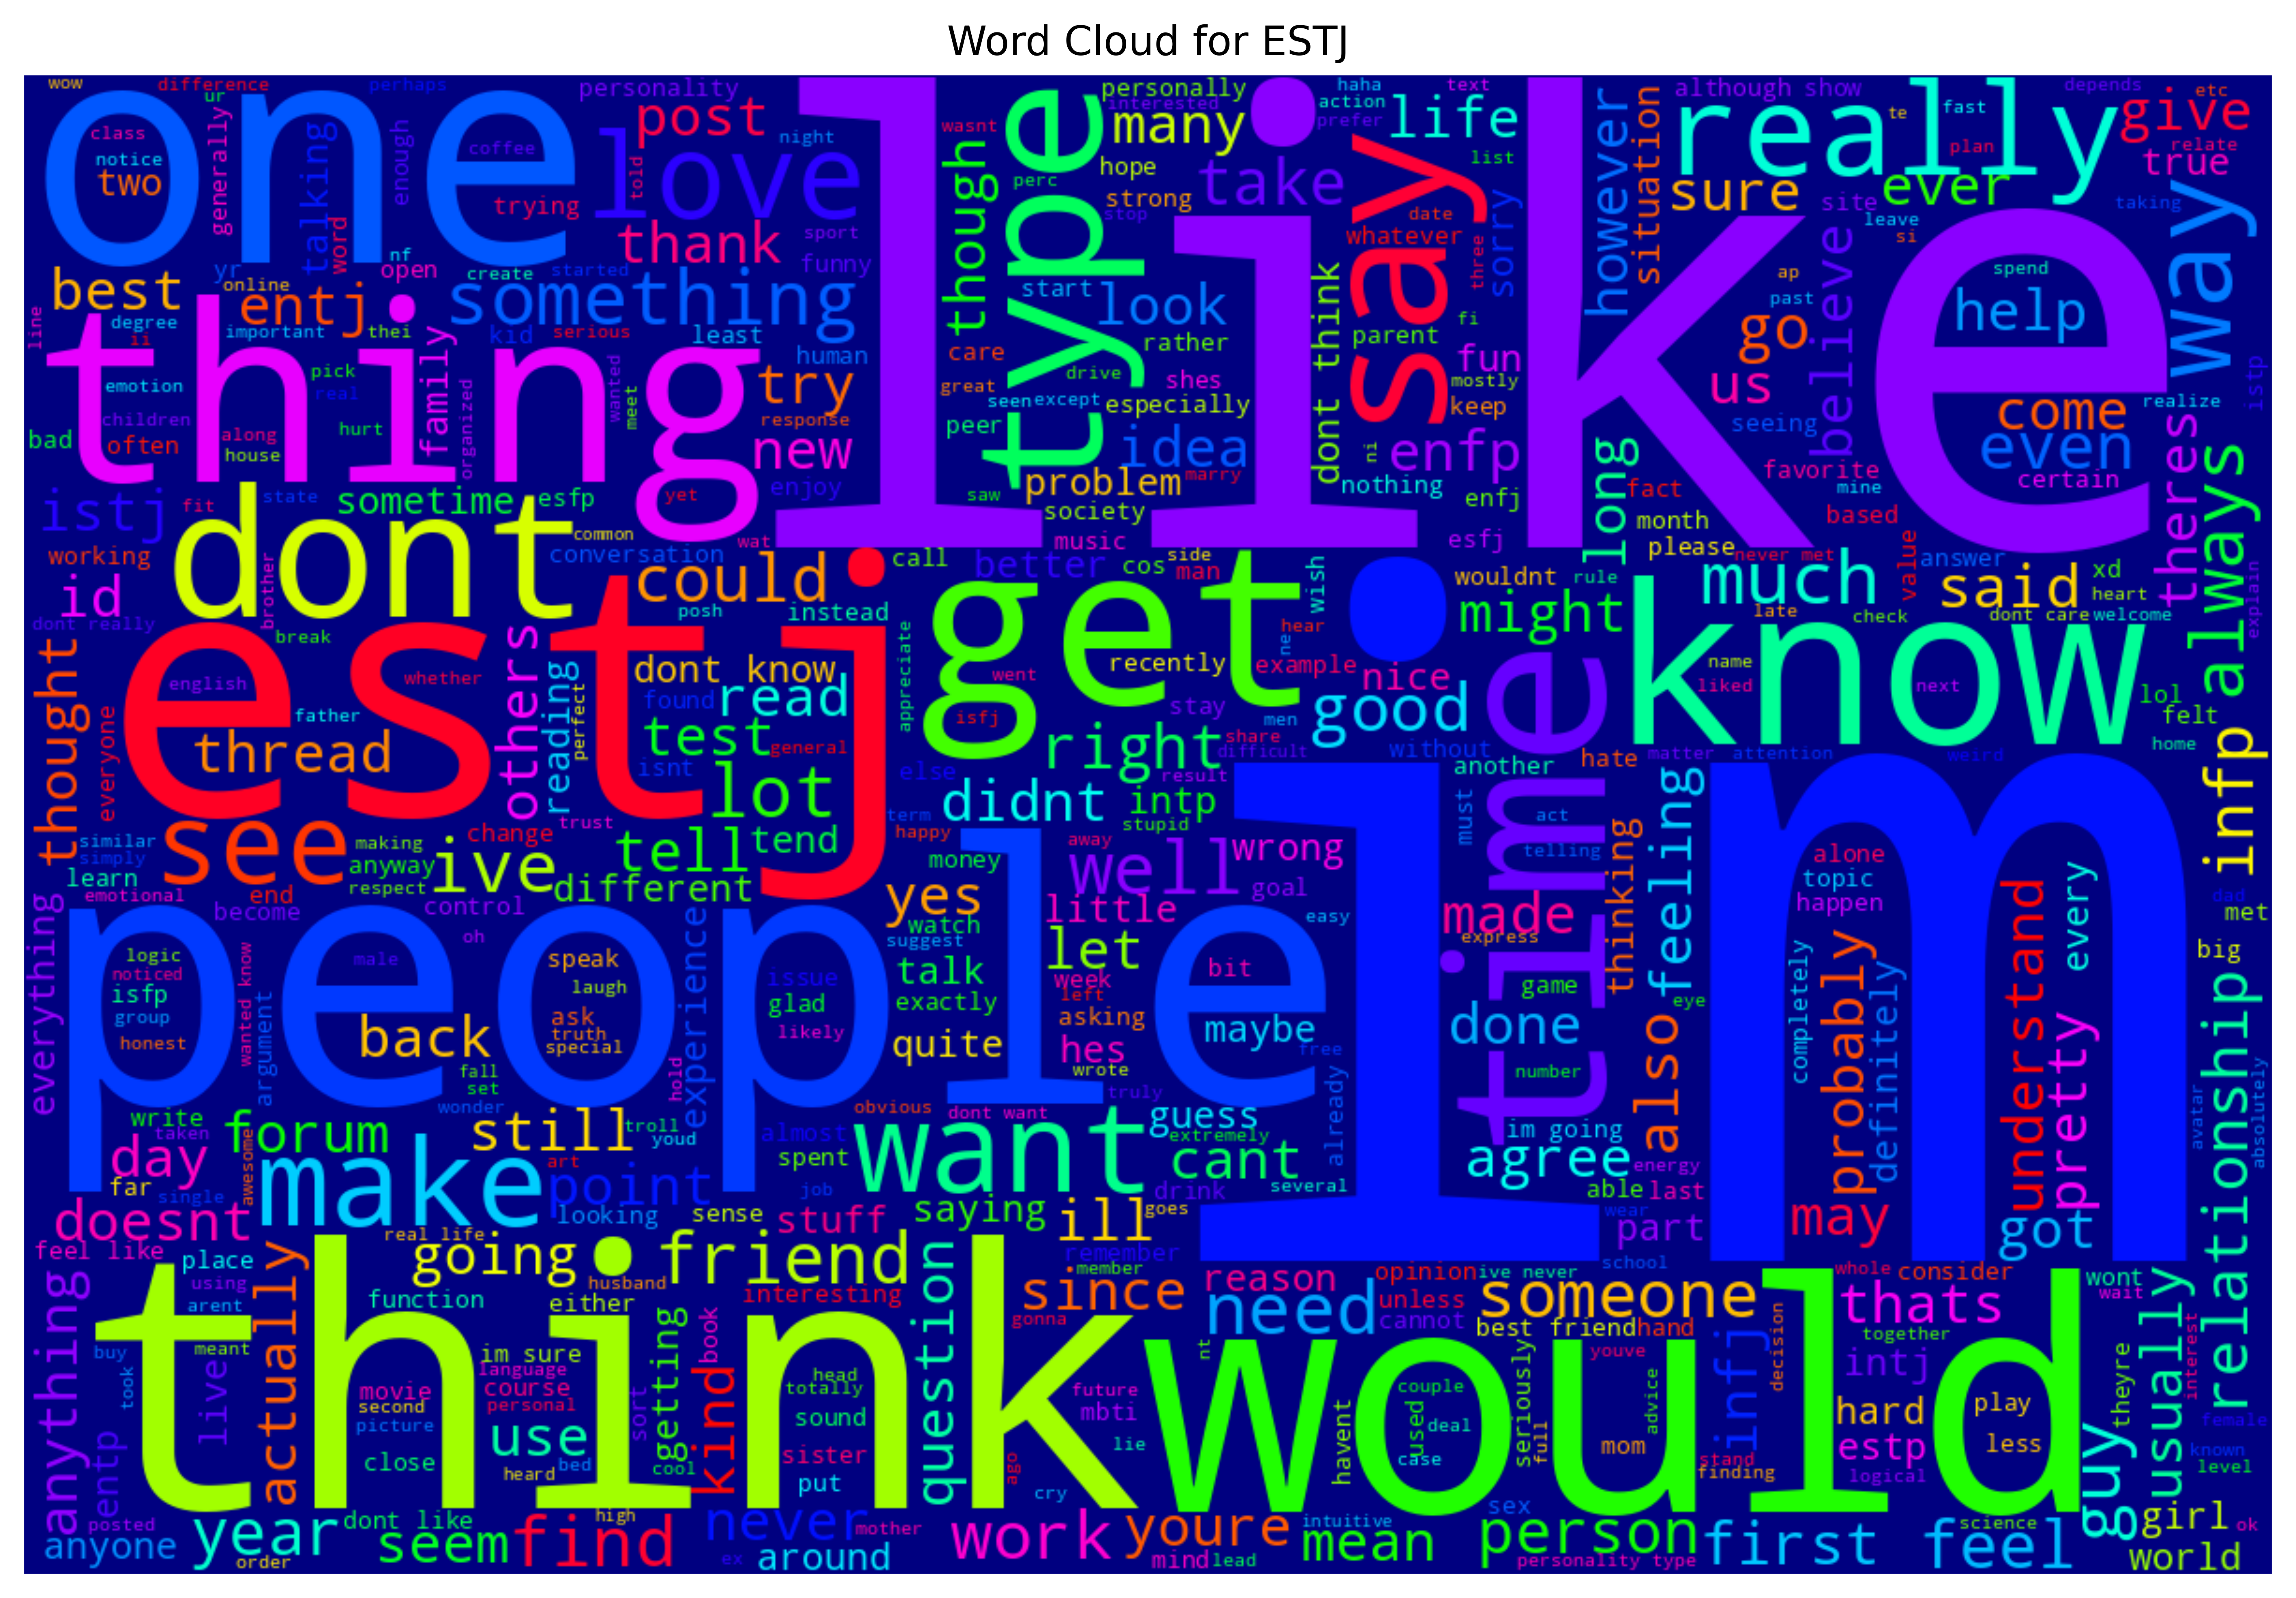

In [ ]:
for i in list(set(data['type'])):
    plt.figure(figsize=(16,8),dpi=600)
    disaster_wordcloud=df[df["type"]==i]
    disaster_text=" ".join(disaster_wordcloud['text2'].values.tolist())
    wordcloud = WordCloud(width=1200, height=800,stopwords=stop_words, background_color='navy', max_words=500,colormap="hsv").generate(disaster_text)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title("Word Cloud for "+i)
    plt.savefig(f'{path}_{i}_data.png',bbox_inches='tight')
    plt.show()

In [ ]:
# WordCloud

wordcloud.wordcloud.WordCloud

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
import numpy as np
from PIL import Image
from wordcloud import WordCloud,STOPWORDS
from collections import Counter
from itertools import chain
import tensorflow as tf
from transformers import XLNetTokenizer, TFXLNetForSequenceClassification
from transformers import XLNetTokenizer, TFXLNetModel
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import roc_curve, auc, precision_recall_curve,average_precision_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import cohen_kappa_score, matthews_corrcoef, log_loss
from tensorflow.keras.callbacks import EarlyStopping,ReduceLROnPlateau
from tensorflow.keras.utils import plot_model
%matplotlib inline

In [ ]:
import tensorflow as tf
import pandas as pd
from keras import layers
from keras.layers import Dense, Activation, Flatten, Convolution1D, Dropout,MaxPooling1D
from keras.layers import Input, Dense, Dropout, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, Embedding, Add
from keras.layers import Conv1D, GlobalAveragePooling1D, AveragePooling2D, MaxPooling2D, MaxPool1D, ZeroPadding1D, GlobalMaxPooling2D, GlobalAveragePooling2D, LSTM, SpatialDropout1D
from keras.models import Sequential, Model
from keras.preprocessing import image
from keras.utils import plot_model
from keras.applications.inception_v3 import InceptionV3
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
from keras.callbacks import ReduceLROnPlateau , EarlyStopping
from keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam, Adamax
import tensorflow as tf
from tensorflow.keras.optimizers import Adam, Adamax,RMSprop
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy',
                                            patience=5,
                                            verbose=1,
                                            factor=0.7,
                                            min_lr=0.000001)

In [ ]:
data

type                                              posts
0     INFJ  'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1     ENTP  'I'm finding the lack of me in these posts ver...
2     INTP  'Good one  _____   https://www.youtube.com/wat...
3     INTJ  'Dear INTP,   I enjoyed our conversation the o...
4     ENTJ  'You're fired.|||That's another silly misconce...
...    ...                                                ...
8670  ISFP  'https://www.youtube.com/watch?v=t8edHB_h908||...
8671  ENFP  'So...if this thread already exists someplace ...
8672  INTP  'So many questions when i do these things.  I ...
8673  INFP  'I am very conflicted right now when it comes ...
8674  INFP  'It has been too long since I have been on per...

[8675 rows x 2 columns]

In [ ]:
# data = df

In [ ]:
data.fillna(' ',inplace=True)

In [ ]:
data.columns

Index(['type', 'posts'], dtype='object')

In [ ]:
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np
maxlen = 45
max_words = 6000
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(data['posts'])
Xsequences = tokenizer.texts_to_sequences(data['posts'])
# loginfo(path=logi,info=f'tokenizing the text using vocab size {max_words*4} and max length {int(df["word_count"].mean())}')


In [ ]:
Xsequences = tf.keras.preprocessing.sequence.pad_sequences(Xsequences, maxlen=maxlen)

In [ ]:
import tensorflow as tf

In [ ]:
data['class'] = data['type'].factorize()[0]

In [ ]:
labels = tf.keras.utils.to_categorical(data['class'],num_classes=16)

In [ ]:
# labels = data['label']

In [ ]:
labels

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
dataset = tf.data.Dataset.from_tensor_slices((Xsequences, labels))

In [ ]:
dataset = dataset.shuffle(1000000).batch(32)

In [ ]:
DS_LEN = len(list(dataset))

In [ ]:
DS_LEN

272

In [ ]:
DATASET_SIZE = len(dataset)

In [ ]:
train_size = int(0.70 * DATASET_SIZE)
val_size = int(0.15 * DATASET_SIZE)
test_size = int(0.15 * DATASET_SIZE)

full_dataset = dataset
full_dataset = full_dataset.shuffle(123424242)
train_dataset = full_dataset.take(train_size)
test_dataset = full_dataset.skip(train_size)
val_dataset = test_dataset.skip(test_size)
test_dataset = test_dataset.take(test_size)

In [ ]:
train = train_dataset
test = test_dataset
val = val_dataset

In [ ]:
embedding_dim = 45

In [ ]:
pa = '‌‌Cnn-lstm'

In [ ]:
# Define model architecture
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=max_words,
                              output_dim=embedding_dim,input_length=maxlen,
                              # weights=[embedding_matrix],
                              # trainable=True
                              ),
    # tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),

    tf.keras.layers.Conv1D(32, 2, activation='relu',),
    # tf.keras.layers.Conv1D(64, 2, activation='relu'),
    # tf.keras.layers.Conv1D(128, 2, activation='relu'),
    # tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32,return_sequences=True)),

    # tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32,return_sequences=True)),
    # tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32,return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    # tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(16, activation='sigmoid')
])

# Compile model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 45, 45)            270000    
                                                                 
 conv1d_8 (Conv1D)           (None, 44, 32)            2912      
                                                                 
 bidirectional_1 (Bidirecti  (None, 64)                16640     
 onal)                                                           
                                                                 
 dense_10 (Dense)            (None, 64)                4160      
                                                                 
 dropout_5 (Dropout)         (None, 64)                0         
                                                                 
 dense_11 (Dense)            (None, 16)                1040      
                                                      

In [ ]:
es = EarlyStopping(monitor="val_loss", mode="min", verbose=1, patience=7)

In [ ]:
llm = 0.90
class haltCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('val_accuracy') >= llm):
            print("\n\n\nReached 0.97 val_accuracy value so cancelling training!\n\n\n")
            self.model.stop_training = True

In [ ]:
trainingStopCallback = haltCallback()

In [ ]:
# Train model
num_epochs = 40
history = model.fit(train,
                    # batch_size=32,
                    epochs=num_epochs,
                    # validati0on_split=0.2,
                    validation_data=[val],
                    callbacks =[
                        # trainingStopCallback
                        learning_rate_reduction,
                                # es
                                ],
                    )

Epoch 1/40
190/190 [==============================] - 20s 76ms/step - loss: 2.3860 - accuracy: 0.1962 - val_loss: 2.2674 - val_accuracy: 0.2165 - lr: 0.0010
Epoch 2/40
190/190 [==============================] - 15s 78ms/step - loss: 2.2860 - accuracy: 0.2076 - val_loss: 2.2136 - val_accuracy: 0.2113 - lr: 0.0010
Epoch 3/40
190/190 [==============================] - 14s 72ms/step - loss: 2.2159 - accuracy: 0.2258 - val_loss: 2.0997 - val_accuracy: 0.2548 - lr: 0.0010
Epoch 4/40
190/190 [==============================] - 14s 72ms/step - loss: 2.0648 - accuracy: 0.2862 - val_loss: 1.9015 - val_accuracy: 0.3557 - lr: 0.0010
Epoch 5/40
190/190 [==============================] - 13s 67ms/step - loss: 1.8836 - accuracy: 0.3591 - val_loss: 1.6368 - val_accuracy: 0.4525 - lr: 0.0010
Epoch 6/40
190/190 [==============================] - 14s 72ms/step - loss: 1.6803 - accuracy: 0.4361 - val_loss: 1.5128 - val_accuracy: 0.5201 - lr: 0.0010
Epoch 7/40
190/190 [==============================] - 15s 

KeyboardInterrupt: 

In [ ]:
tr = []
pr = []
l = 0
for i,j in test.take(-1):
  s = model.predict(i,verbose=0)
  tr.append(np.array(j))
  pr.append(np.array(s))

In [ ]:
yp = np.concatenate([y for y in pr], axis=0)
yt = np.concatenate([y for y in tr], axis=0)


In [ ]:
yp = yp.argmax(axis=1)
yt = yt.argmax(axis=1)

In [ ]:
from sklearn.metrics import *


In [ ]:
accuracy_score(yt,yp)

0.97265625

In [ ]:
# yp[yp < 0.5] = 0
# yp[yp > 0.5] = 1
# y1 = y_test
# print(classification_report(yt,yp,zero_division=True))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       192
           1       0.98      0.99      0.99       106
           2       0.98      1.00      0.99       188
           3       1.00      0.99      1.00       179
           4       0.92      1.00      0.96        35
           5       0.94      0.94      0.94        35
           6       1.00      1.00      1.00       261
           7       0.99      0.99      0.99        97
           8       0.81      0.96      0.88        46
           9       1.00      0.98      0.99        47
          10       0.88      0.93      0.90        30
          11       1.00      0.69      0.82        26
          12       0.86      0.80      0.83        15
          13       0.60      0.60      0.60         5
          14       0.71      0.71      0.71         7
          15       1.00      0.45      0.62        11

    accuracy                           0.97      1280
   macro avg       0.92   

In [ ]:
# yp = np.concatenate([y for y in pr], axis=0)
# yt = np.concatenate([y for y in tr], axis=0)


In [ ]:
mpath = path

In [ ]:
y1 = yp.reshape(-1,) # np.zeros((y_test.shape[0],))
y2 = yt.reshape(-1,)
ff = pd.DataFrame(columns=['real','predicted'],)
ff['real'] = y2
ff['predicted'] = y1
# pa = 'Albert'

ff.to_csv(f'{mpath}{pa}.csv',index=False)

In [ ]:
ff

real  predicted
0        0          0
1        4          4
2        2          2
3        6          6
4        6          6
...    ...        ...
1275     1          1
1276     9          9
1277     2          2
1278     2          2
1279     2          2

[1280 rows x 2 columns]

In [ ]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve,average_precision_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import cohen_kappa_score, matthews_corrcoef, log_loss

In [ ]:
from sklearn.metrics import *

In [ ]:
# np.array(round(ff['predicted'])).astype(int)

In [ ]:
path

'/content/drive/MyDrive/mbti71c/'

In [ ]:
/content/drive/MyDrive/c43work53/‌‌Bi-LSTM.csv

In [ ]:
ff = pd.read_csv(f'/content/drive/MyDrive/mbti71c/‌‌Cnn-lstm.csv')
ff.columns = ['real','predicted']

In [ ]:
l1,l2 = np.array(ff['real']),np.array(round(ff['predicted'])).astype(int)

In [ ]:
from sklearn import metrics
import itertools

In [ ]:
# # Applying confusion matrix
# def plot_confusion_matrix(cm, classes,name,normalize = False,cmap = plt.cm.Blues,title = 'Normal Confusion matrice'):
#     plt.imshow(cm,interpolation = 'nearest',cmap = cmap)
#     plt.title(title+f' for {name}')
#     plt.colorbar()
#     tick_marks = np.arange(len(classes))
#     plt.xticks(tick_marks,classes,rotation =45)
#     plt.yticks(tick_marks,classes)

#     if normalize:
#         cm = cm / np.sum(cm, axis=1)[:,np.newaxis]
#         # cm
#         print("Normalized confusion matrix")
#     else:
#         print('Confusion matrix, without normalization')
#     thresh = cm.max()/2
#     for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])) :
#         plt.text(j,i, round(cm[i,j],3), horizontalalignment ="center",color ="white" if cm[i,j]>thresh else "black")
#     plt.tight_layout()
#     plt.ylabel('True label')
#     plt.xlabel('Predicted label')
#     plt.savefig(f'{path}{name}.png',bbox_inches='tight')
#     pd.DataFrame(cm).to_csv(f'{path}{name}.csv',index=False)

In [ ]:
# cm / np.sum(cm, axis=1)[:,np.newaxis]

In [ ]:
# cm

In [ ]:
# round(cm,6)

accuracy:   0.973


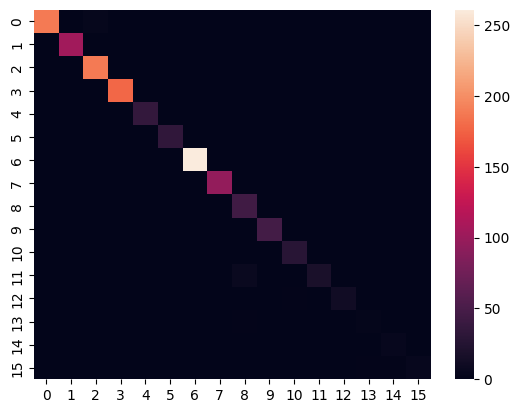

In [ ]:
score = metrics.accuracy_score(l1,l2)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(l1, l2)
# cm.shape
sns.heatmap(cm)
pd.DataFrame(cm).to_csv(f'{path}conf_Cnn-lstm.csv',index=False)
plt.savefig(f'{path}conf_Cnn-lstm.png',bbox_inches='tight')
# plot_confusion_matrix(cm, classes=['FAKE', 'REAL'],normalize=True,name='AlBert')

In [ ]:
accuracy_score(l1,l2),precision_score(l1,l2,average='weighted'),recall_score(l1,l2,average='weighted'),f1_score(l1,l2,average='weighted')

(0.97265625, 0.9741498316872838, 0.97265625, 0.9716500921913511)

In [ ]:
# res = pd.DataFrame()

In [ ]:
res['Cnn-lstm']=list([accuracy_score(l1,l2),precision_score(l1,l2,average='weighted'),recall_score(l1,l2,average='weighted'),f1_score(l1,l2,average='weighted')])
res

1-CNN     2-CNN     3-CNN  Cnn-lstm
0  0.909375  0.792188  0.693750  0.972656
1  0.894446  0.820142  0.813470  0.974150
2  0.909375  0.792188  0.693750  0.972656
3  0.900041  0.790446  0.659775  0.971650

In [ ]:
res

1-CNN     2-CNN     3-CNN  Cnn-lstm
0  0.909375  0.792188  0.693750  0.972656
1  0.894446  0.820142  0.813470  0.974150
2  0.909375  0.792188  0.693750  0.972656
3  0.900041  0.790446  0.659775  0.971650

In [ ]:
# res['AM Malik et.al'] = [0.9763, 0.9761, 0.9762, 0.9761]

In [ ]:
res.index = ['Acciracy','Precision','Recall','F1']

In [ ]:
res.to_csv(f'{path}res.csv')

In [ ]:
import matplotlib.pyplot as plt

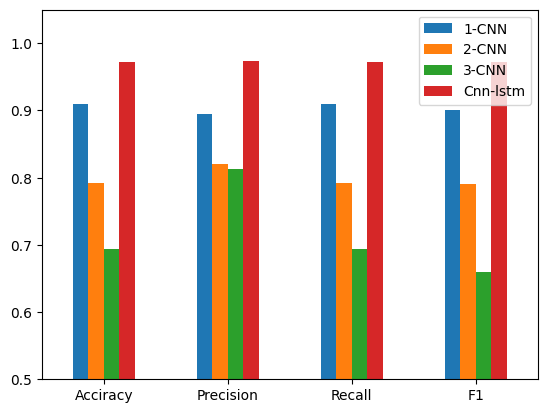

In [ ]:
res.plot(kind='bar')
plt.ylim(0.5,1.05)
plt.xticks(rotation=0)
plt.savefig(f'{path}res.png',bbox_inches='tight')

In [ ]:
res

1-CNN     2-CNN     3-CNN  Cnn-lstm
Acciracy   0.909375  0.792188  0.693750  0.972656
Precision  0.894446  0.820142  0.813470  0.974150
Recall     0.909375  0.792188  0.693750  0.972656
F1         0.900041  0.790446  0.659775  0.971650